# Week 10: Newton's method continued

This week, we introduce Newton's method to find roots of functions of **multiple variables**, and discover how Newton's method is used to solve **optimisation problems** by finding minima/maxima of an objective function.


The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [ ]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w10_solutions.md')

---
### 📚 Book sections

- **ASC**: section 5.6
- **PCP**: section 7.6

---
## 1. Root finding continued

### 1.1. Combining methods

One way in which Newton's method can fail is by getting "trapped" in a cycle. This can happen with certain functions, when choosing an initial guess which is too far from the root.

---
🚩 **Exercise 1**

Consider the nonlinear equation

$$
F(x) = x + 1 + \tan^{-1}(10x) = 0.
$$

Plot this function on the interval $[-3, 3]$. Compute 30 iterations of Newton's method with the initial guess $x_0 = -2$, and plot the guess $x_k$ against the iteration number $k$. What do you observe?

You may wish to adapt the scripts `newton_example.py` or `cobweb.py` from the [Week 9 video](https://github.com/cnu-23/cnu-w09-lecture) to display the first few iterations. (Note that `cobweb.ipynb` from the [Week 9 workshop solutions](https://github.com/cnu-23/cnu-w09-workshop) should work best for animated plots.)

*Hint:* the derivative of $\tan^{-1}(x)$ is $\frac{1}{1 + x^2}$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def F(x):
    return x + 1 + np.arctan(10 * x)

def Fp(x):
    return 1 + 10 / (1 + 100 * x **2)

x0 = -2
x = np.linspace(-3, 3, 500)
k = 0

def G(x):
    return x - F(x)/Fp(x)

xk = np.zeros(30)

# Loop until convergence
while k < 30:
    x0 = G(x0)   
    xk[k] = x0
    k += 1

fig, ax = plt.subplots(1, 2)
ax[1].plot(np.linspace(0, k, k), xk)
ax[0].plot(x, F(x))

In [ ]:
show('Exercise 1')

---
🚩 **Exercise 2**

A strategy to mitigate the sensitivity of Newton's method to the choice of initial guess is to first use a bracketing method which is sure to converge, for just a few iterations. Then, the result can be used as an initial guess for Newton's method, and take advantage of the quadratic order of convergence as we are sufficiently close to the root to refine it quickly to a much higher precision.

Compute a few iterations of the bisection or the regula falsi method, using the starting interval $[-3, 3]$, with a tolerance of $10^{-1}$. Then, use the result as the initial guess for Newton's method, to refine the root with a tolerance of $10^{-12}$. As in Exercise 1, plot the current guess $x_k$ versus the iteration number $k$, *starting the iteration count with the first iteration of the bracketing method*.

In [ ]:
a, b = -3, 3
iter = 0
c = (a + b)/2
guess = [c]

while abs(F(c)) > 1.0e-1:
    
    if F(c) * F(a) <= 0:
        b = c
    else:
        a = c
    
    c = (a + b)/2
    guess.append(c)
    iter += 1

x0 = guess[-1]

# Loop until convergence
while True:
    x_new = G(x0)

    # Convergence achieved
    if abs(x_new - x0) < 1.0e-12:
        break
        
    # Update for next iteration
    x0 = x_new

    iter += 1
    guess.append(x0)


fig, ax = plt.subplots(1, 2)
ax[1].plot(np.linspace(0, iter + 1, iter + 1), guess)
ax[0].plot(x, F(x))

# Starting interval
a, b = -3., 3.

# Tolerance for bisection
tol = 1e-1

# Iteration count
k = 0

# Bisection method to refine the initial guess.
# Midpoint
c = 0.5 * (a + b)
xk = [c]

# Loop until the root is found
while abs(F(c)) >= tol:
    # Increment the iteration count
    k += 1

    if F(a) * F(c) <= 0.0:    # F(a) and F(c) have different signs (or one or both is zero) ...
        b = c                 # ... a root is between a and c (or equals a or c)
    else:
        a = c                 # Else, a root is between c and b (or equals b)

    # Find the next midpoint
    c = 0.5 * (a + b)
    xk.append(c)

# Mark the end of bisection iterations for plotting later
k_bisection = k

# Newton's method to refine the guess
tol = 1e-12

while abs(F(xk[-1])) >= tol:
    xk.append(xk[-1] - F(xk[-1]) / Fp(xk[-1]))
    k += 1
    
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].plot(range(k_bisection + 1), xk[:k_bisection + 1], 'ro', label='Bisection')
ax[0].plot(range(k_bisection + 1, k + 1), xk[k_bisection + 1:], 'bs', label='Newton')
ax[0].set(title='Bisection + Newton iterations', xlabel='Iteration number', ylabel='Current guess')

ax[1].plot(range(k_bisection + 1), abs(xk[:k_bisection + 1] - xk[-1]), 'ro', label='Bisection')
ax[1].plot(range(k_bisection + 1, k), abs(xk[k_bisection + 1:-1] - xk[-1]), 'bs', label='Newton')
ax[1].set(title='Bisection + Newton error', xlabel='Iteration number', ylabel='Absolute error', ylim=[-0.1, 0.3])

plt.show()

In [ ]:
show('Exercise 2')

## 2. Newton's method in multiple dimensions

In weeks 8 and 9, we have considered several methods to find roots of nonlinear functions of one variable. Amongst these methods, Newton's method in particular can also be used to solve systems of multiple nonlinear equations, i.e. to find roots of functions of multiple variables.

A system of $n$ nonlinear equations in $n$ unknowns can be written as:

$$
\begin{cases}
F_1(x_1, x_2, \dots, x_n) = 0 \\
F_2(x_1, x_2, \dots, x_n) = 0 \\
\dots \\
F_n(x_1, x_2, \dots, x_n) = 0 \\
\end{cases}
\quad \Leftrightarrow \quad
\mathbf{F(x)} = \mathbf{0}, \qquad \text{where} \: \mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}.
$$

The solution to this system of equations is the root $\mathbf{x_\ast} \in \mathbb{R}^n$ of the function $\mathbf{F}: \mathbb{R}^n \to \mathbb{R}^n$.

### 2.1. Derivation

For functions of one variable, we derived the Newton iteration by truncating the Taylor expansion of $F(x)$ around the current guess $x_k$ to first order. What does this become in multiple dimensions?

The Taylor expansion of $F_i(\mathbf{x})$, the $i$th component of $\mathbf{F(x)}$, around the current (vector) guess $\mathbf{x}_k$, truncated to first order, is given by

$$
F_i(\mathbf{x}) \approx F_i(\mathbf{x}_k) + \nabla F_i(\mathbf{x}_k)^T (\mathbf{x} - \mathbf{x}_k),
\quad i=1, 2, \dots, n,
\qquad \text{with} \quad
\nabla F_i(\mathbf{x}_k) =
\begin{bmatrix}
\frac{\partial F_i}{\partial x_{1, k}} \\
\frac{\partial F_i}{\partial x_{2, k}} \\
\vdots \\
\frac{\partial F_i}{\partial x_{n, k}}
\end{bmatrix}.
$$

Here, $\nabla F_i(\mathbf{x}_k)$ is the **gradient** of $F_i$ evaluated at $\mathbf{x} = \mathbf{x}_k$. We can write these $n$ Taylor polynomials as one vector equation:

$$
\mathbf{F(x)} \approx \mathbf{F}(\mathbf{x}_k) +
\begin{bmatrix}
\nabla F_1(\mathbf{x}_k)^T \\
\nabla F_2(\mathbf{x}_k)^T \\
\vdots \\
\nabla F_n(\mathbf{x}_k)^T
\end{bmatrix}
(\mathbf{x} - \mathbf{x}_k)
= \mathbf{F}(\mathbf{x}_k) + \mathbf{J}_k (\mathbf{x} - \mathbf{x}_k).
\qquad \qquad \qquad \color{red}{(\ast)}
$$

The matrix $\mathbf{J}_k \in \mathbb{R}^{n\times n}$ is the **Jacobian** matrix of $\mathbf{F}$, evaluated at $\mathbf{x} = \mathbf{x}_k$. The $i$th row of the Jacobian matrix contains all partial derivatives of $F_i$, and the $j$th column contains the partial derivatives of each component of $\mathbf{F}$ with respect to $x_j, k$ (the $j$th component of the guess $\mathbf{x}_k$ at the $k$th iteration):

$$
\mathbf{J}_k =
\begin{bmatrix}
\frac{\partial F_1}{\partial x_{1, k}} &
\frac{\partial F_1}{\partial x_{2, k}} &
\dots &
\frac{\partial F_1}{\partial x_{n, k}} \\
\frac{\partial F_2}{\partial x_{1, k}} &
\frac{\partial F_2}{\partial x_{2, k}} &
\dots &
\frac{\partial F_2}{\partial x_{n, k}} \\
\vdots & & \ddots & \\
\frac{\partial F_n}{\partial x_{1, k}} &
\frac{\partial F_n}{\partial x_{2, k}} &
\dots &
\frac{\partial F_n}{\partial x_{n, k}} \\
\end{bmatrix}.
$$

With a similar reasoning as for the single-variable case, we seek a new guess $\mathbf{x}_{k+1}$ which is closer to the root $\mathbf{x}_\ast$ by equating $\color{red}{(\ast)}$ to $\mathbf{0} \in \mathbb{R}^n$:

$$
\mathbf{F}(\mathbf{x}_{k+1}) \approx \mathbf{F}(\mathbf{x}_k) + \mathbf{J}_k (\mathbf{x}_{k+1} - \mathbf{x}_k) = 0
\qquad \Leftrightarrow \qquad
\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{J}_k^{-1} \mathbf{F}(\mathbf{x}_k).
$$

At each iteration, we now have to solve a linear system to obtain the next guess.

### 2.2. Practical implementation

#### Iteration

Recall from Week 4 that **computing the inverse** $\mathbf{J}_k^{-1}$ **explicitly is not a good idea**; a better strategy is to solve the system

$$
\mathbf{J}_k \mathbf{e}_k = -\mathbf{F}(\mathbf{x}_k)
$$

for $\mathbf{e}_k = \mathbf{x}_{k+1} - \mathbf{x}_k$ at each iteration; this can be done e.g. with Gaussian elimination, using either your own implementation or `np.linalg.solve()`.

The next guess is then found easily as $\mathbf{x}_{k+1} = \mathbf{e}_k + \mathbf{x}_k$.

#### Convergence criterion

In higher dimensions, we can check for convergence in a similar manner as before, for example
- by checking $\mathbf{x}_{k+1} - \mathbf{x}_k$ to assert that we are not further improving our best guess,
- by checking $\mathbf{F}(\mathbf{x}_k)$ to assert whether it is sufficiently close to zero.

Since both these quantities are now vectors, we can check whether the **norm** is smaller than our desired tolerance -- for instance, we could establish convergence when $\|\mathbf{x}_{k+1} - \mathbf{x}_k\| < \delta$ for some small tolerance $\delta$, or $\|\mathbf{F}(\mathbf{x}_k)\| < \varepsilon$ for some small tolerance $\varepsilon$. The norm of a vector is easily computed using `np.linalg.norm()`.

---
🚩 **Exercise 3**

In this exercise, we are seeking the intersections $\mathbf{x}_\ast = [x_{\ast, 1}, x_{\ast,2}]^T$ of two curves defined respectively by $x_1^2 + x_2^2 = 8$ and $x_2^3 - 5x_1^2 x_2 = -8$. The code below displays these two curves; study the documentation for [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) and [`plt.contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) to understand how it works.

The intersections $\mathbf{x}_\ast$ are the roots of a nonlinear function $\mathbf{F}:\mathbb{R}^2 \to \mathbb{R}^2$, i.e. the solutions of the nonlinear system

$$
\mathbf{F(x)} = \mathbf{0}
\qquad \Leftrightarrow \qquad
\begin{cases}
F_1(x_1, x_2) = x_1^2 + x_2^2 - 8 = 0, \\
F_2(x_1, x_2) = x_2^3 - 5x_1^2 x_2 + 8 = 0.
\end{cases}
$$

We will use Newton's method as described above to compute the intersection points.

Write a function `Jac(x1, x2)` which computes the $2\times 2$ Jacobian matrix

$$
\mathbf{J} =
\begin{bmatrix}
\frac{\partial F_1}{\partial x_1} &
\frac{\partial F_1}{\partial x_2} \\
\frac{\partial F_2}{\partial x_1} &
\frac{\partial F_2}{\partial x_2}
\end{bmatrix},
$$

evaluated at a point $\mathbf{x} = [x_1, x_2]^T$, and returns the result as a $2\times 2$ Numpy array.

A couple of tests are included at the end of the code cell to check your function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F1(x1, x2):
    return x1**2 + x2**2 - 8

def F2(x1, x2):
    return x2**3 - 5 * x1**2 * x2 + 8

# Create a grid of values of x1 and x2 to evaluate both functions
xmin, xmax = -5, 5
ymin, ymax = -5, 5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

# Create a contour plot to display the intersection of
# z = F1(x1, x2) and z = F2(x1, x2) with the plane z = 0
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, F1(X, Y), 0, colors='r')
ax.contour(X, Y, F2(X, Y), 0, colors='b')

ax.set(xlabel='x1', ylabel='x2', xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()

In [20]:
def Jac(x1, x2):
   J = np.zeros([2, 2])
   J[0, 0] = 2 * x1
   J[0, 1] = 2 * x2
   J[1, 0] = -10 * x1 * x2
   J[1, 1] = J[1, 1] = 3 * x2**2 - 5 * x1**2
   return J

# Tests
assert np.allclose(Jac(0, 0), np.zeros([2, 2]))
assert np.allclose(Jac(1, 1), np.array([[2, 2], [-10, -2]]))
assert np.allclose(Jac(0, 1), np.array([[0, 2], [0, 3]]))

In [21]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 4**

Looking at the plot above, pick one of the intersection points, and choose a suitable first guess nearby. Store it as a Numpy vector `x` of 2 `float`s, with `x[0]` representing $x_1$ and `x[1]` representing $x_2$.

Use Newton's method to compute the coordinates $[x_{\ast, 1}, x_{\ast, 2}]^T$ of the intersection, within a tolerance of $10^{-12}$. You may wish to write a function `F(x1, x2)` to return a Numpy vector of length 2 representing $[F_1(x_1, x_2), F_2(x_1, x_2)]^T$.

Repeat your calculations to find all 6 intersections.

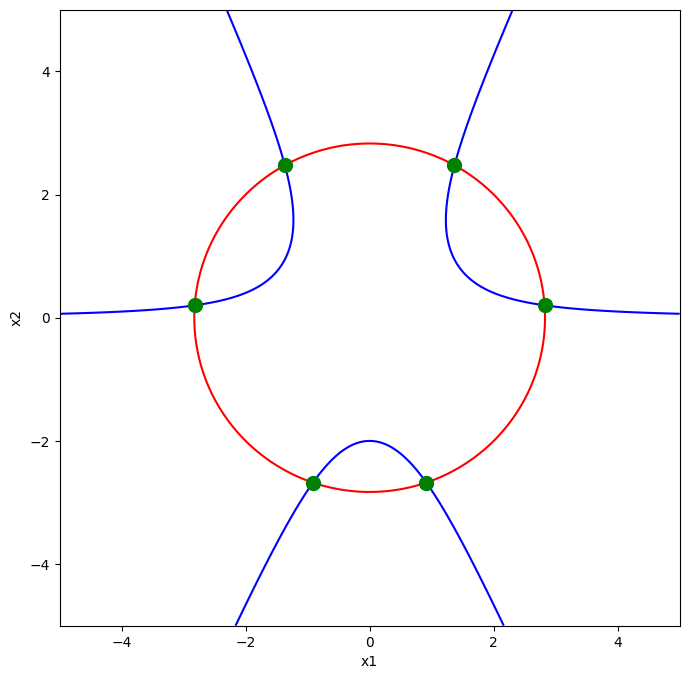

In [26]:
# Intial guesses
x0 = np.array([[-3., 0.],
               [-2., 2.],
               [2., 2.],
               [3., 0.],
               [1., -3.],
               [-1., -3.]])

# Initialise an array to store all the roots
roots = []

def F(x1, x2):
    return np.array([F1(x1, x2), F2(x1, x2)])

for x in x0:

    while np.linalg.norm(F(x[0], x[1])) >= 1e-12:
        J = Jac(x[0], x[1])
        e = -np.linalg.solve(J, F(x[0], x[1]))
        x += e

    # Store the results
    roots.append(x)


# Plot the roots on the same graph
roots = np.array(roots)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, F1(X, Y), 0, colors='r')
ax.contour(X, Y, F2(X, Y), 0, colors='b')

ax.plot(roots[:, 0], roots[:, 1], 'go', markersize=10)

ax.set(xlabel='x1', ylabel='x2', xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()

In [27]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 1.3. Example application: triangulating a signal

To determine your position accurately, a GPS system uses 3 satellites at known locations. A signal is emitted from your device (e.g. your phone), which travels at the speed of light; the distance $d_i, i=1, 2, 3$ between you and each satellite is then calculated by measuring how long it took the signal to travel all the way to the satellite and all the way back to you.

Each satellite, individually, can locate you on a sphere of radius $d_i$ centred around its position $[x_i, y_i, z_i]^T$. The three spheres for each satellite intersect at a point $[x_\ast, y_\ast, z_\ast]^T$, corresponding to your location. In other words, the point $[x_\ast, y_\ast, z_\ast]^T$ solves the nonlinear system

$$
\begin{cases}
F_1(x, y, z) = (x - x_1)^2 + (y - y_1)^2 + (z - z_1)^2 = d_1^2 \\
F_2(x, y, z) = (x - x_2)^2 + (y - y_2)^2 + (z - z_2)^2 = d_2^2 \\
F_3(x, y, z) = (x - x_3)^2 + (y - y_3)^2 + (z - z_3)^2 = d_3^2 \\
\end{cases}
$$

---
🚩 **Exercise 5**

You have built your own GPS system at ground level in Edinburgh. You've placed 3 radio transceivers in the city, at the following Northing/Easting coordinates **\***:
- one at the top of the [Salisbury Crags](https://gridreferencefinder.com?gr=NT2679873275|326798_s__c__s_673275|1&v=r&labels=1), at coordinates $x_C = 326798, y_C = 673275$
- one at the top of the [Forth Bridge](https://gridreferencefinder.com/#gr=NT1362878976|313628_s__c__s_678976|1), at coordinates $x_B = 313628, y_B = 678976$
- one at the top of the [Scott Monument](https://gridreferencefinder.com?gr=NT2558573905|325585_s__c__s_673905|1&v=r&labels=1), at coordinates $x_S = 325585, y_S = 673905$

At your current location, with coordinates $(x, y)$, you send a radio signal (a short pulse) to the 3 transceivers, which comes back to you at different times for each transceiver. You record the following time delays between sending and receiving the signal (assume that it travels at the speed of light, and is reflected to you immediately after it arrives at the transceiver):

$$
\Delta t_C = 18.708 \mu s, \qquad
\Delta t_B = 104.115 \mu s, \qquad
\Delta t_S = 24.1092 \mu s.
$$

Compute the distances $d_C, d_B, d_S$ between you and each transceiver, and use the function `circle_coords()` given below to plot 3 circles, each centred around a different transceiver, and each with radius $d_C, d_B, d_S$ respectively.

**\*** [Northing and Easting coordinates](https://digimap.edina.ac.uk/webhelp/os/data_information/os_data_issues/grid_ref_conversion.htm) are given in **metres**, relative to a reference position south-west of the UK.

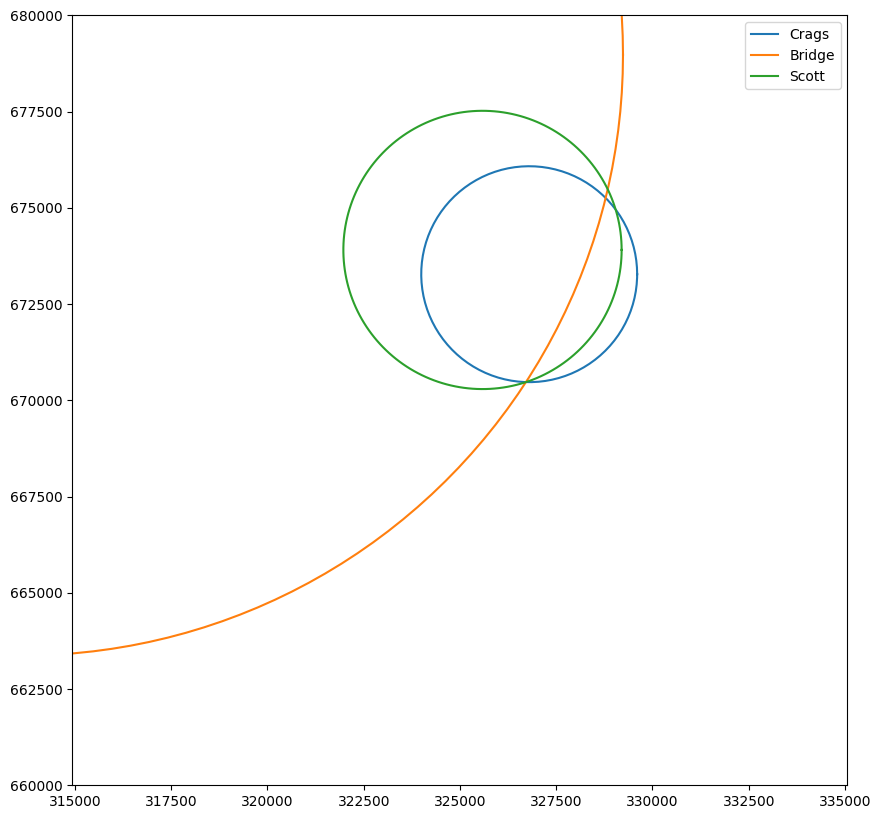

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def circle_coords(c, r):
    '''
    Returns points [x, y] which can be used to plot a circle
    of radius r, centred at a point c = [cx, cy].
    
    Example usage - circle centred at (1, -1), radius 0.5:
    
    x, y = circle_coords([1, -1], 0.5)
    plt.plot(x, y)
    '''
    t = np.linspace(0, 2*np.pi, 200)
    x = r * np.cos(t) + c[0]
    y = r * np.sin(t) + c[1]
    return x, y

# Transceiver coordinates
coords = np.array([[326798, 673275],
                   [313628, 678976],
                   [325585, 673905]], dtype=float)

# Time delays
dt = np.array([1.8708e-05, 0.000104115, 2.41092e-05])

# Speed of light (m/s)
c = 299792458.

# Distances (divide by 2 to account for the round trip)
dist = c * dt / 2

# Plot the circles
fig, ax = plt.subplots(figsize=(10, 10))
labels = ['Crags', 'Bridge', 'Scott']
for i in range(3):
    x, y = circle_coords(coords[i, :], dist[i])
    ax.plot(x, y, label=labels[i])

ax.axis('equal')
ax.set(xlim=[3.2e5, 3.3e5], ylim=[6.6e5, 6.8e5])
ax.legend()
plt.show()

In [32]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 6**

Your position here is only determined by 2 coordinates, $x$ and $y$. Using only 2 transceivers allows you to narrow down your position to 2 possible points (the 2 intersections between the 2 corresponding circles); we can use the third transceiver to help us choose an initial guess, to converge towards the correct location.

Use the information provided by the first 2 transceivers (on the Crags and on the Forth Bridge) to determine your position $(x, y)$, within a tolerance of 1 metre. Choose an initial guess near the intersection of the 3 circles in your plot above.

You can check your results by typing them into the "X (Easting) / Y (Northing)" box on [this website](https://gridreferencefinder.com/).

[326798. 313628.]


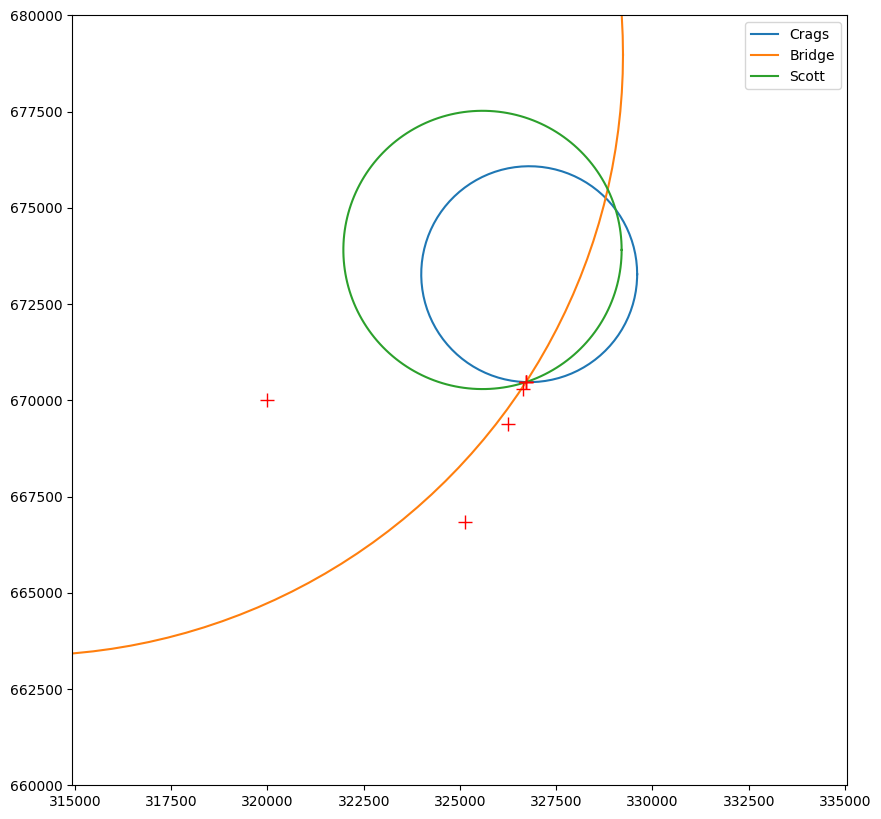

My position is 326714 (Easting), 670472 (Northing).


In [38]:
# Plot the circles
fig, ax = plt.subplots(figsize=(10, 10))
labels = ['Crags', 'Bridge', 'Scott']
for i in range(3):
    x, y = circle_coords(coords[i, :], dist[i])
    ax.plot(x, y, label=labels[i])

ax.axis('equal')
ax.set(xlim=[3.2e5, 3.3e5], ylim=[6.6e5, 6.8e5])
ax.legend()

# Function whose root we need -- we only use the first 2 transceivers
def F(x):
    return (x[0] - coords[:2, 0])**2 + (x[1] - coords[:2, 1])**2 - dist[:2]**2

# Jacobian matrix
def Jac(x):
    J = np.zeros([2, 2])
    J[:, 0] = 2 * (x[0] - coords[:2, 0])
    J[:, 1] = 2 * (x[1] - coords[:2, 1])
    return J

# Tolerance: 1 metre
tol = 1

# Initial guess
x = np.array([3.2e5, 6.7e5])
ax.plot(x[0], x[1], 'r+', markersize=10)

# Newton method
while np.linalg.norm(F(x)) > tol:
    x -= np.linalg.solve(Jac(x), F(x))
    ax.plot(x[0], x[1], 'r+', markersize=10)

plt.show()

print(f'My position is {x[0]:.0f} (Easting), {x[1]:.0f} (Northing).')

In [37]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise**

Try some of the exercises given at the end of Section 5.6 in **ASC**.

---
## 2. Newton's method for optimisation

Many problems in applied mathematics boil down to an **optimisation** problem. In mathematics, optimisation describes the process of finding values which minimise or maximise an **objective function**, possibly subjected to some constraints.

When $x_\ast$ is a (local) maximum or minimum of a function $F(x)$, we have $F'(x_\ast) = 0$. If $F$ is twice differentiable and $F''(x_\ast) \neq 0$, we can apply Newton's method to $F'(x)$ to find the extremum $x_\ast$ as the point at which the derivative is zero. If convergence conditions are satisfied, then the following iteration

$$
x_{k+1} = x_k - \frac{F'(x_k)}{F''(x_k)},
$$

will converge to $x_\ast$, a local extremum of $F(x)$.

Here are a few example optimisation problems, adapted from [1]. For each of the problems:

1. Plot the function which you want to minimise or maximise (the objective function), to visualise approximately where the local maximum or minimum is located. You can also plot the derivative to visualise where it is zero.
2. Choose an appropriate initial guess nearby.
3. Apply Newton's method to the **derivative** of the function to find the maximum or minimum.

[1] Stewart, J. (2008). Metric International Version Calculus. Thomson Brooks/Cole.

---
🚩 **Exercise 7**

A model used for the yield $Y(N)$ of an agricultural crop as a function of the nitrogen level $N$ in the soil is

$$
Y(N) = \frac{kN}{2 + N^2},
$$

where $k$ is a positive constant.

Use Newton's method applied to $Y'(N)$ to compute the nitrogen level $N_\ast$ which maximises the yield $Y(N)$. Also solve the problem analytically to confirm that your value is correct.

Not all initial guesses will lead to convergence; it may be useful to plot $Y'(N)$ here to help you choose one. (Note that $N_\ast$ doesn't depend on the value of $k$ -- you can choose any positive value.)

1.4142135623730943


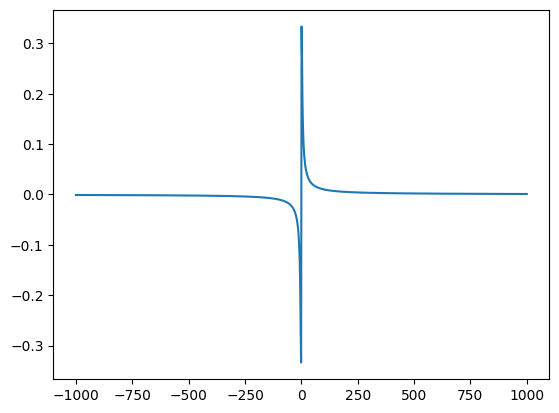

In [51]:
def Y(N):
    return N / (2 + N**2)

def Yp(N):
    return 1 / (2 + N**2) - 2*N**2 / (2 + N**2)**2

def Ypp(N):
    return -6*N / (2 + N**2)**2 + 8*N**3 / (2 + N**2)**3

N = np.linspace(-1000, 1000, 1000)
fig, ax = plt.subplots()
ax.plot(N, Y(N))

N0 = 1
while np.abs(Yp(N0)) >= 1e-12:
    N0 -= Yp(N0)/Ypp(N0)
print(N0)

In [52]:
show('Exercise 7')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 8**

An object with a mass $m$ is dragged along a horizontal plane by a force acting along a rope attached to the object. If the rope makes an angle $\theta$ with the plane, the magnitude of the force is

$$
F = \frac{\mu m g}{\mu \sin \theta + \cos \theta},
$$

where $\mu$ is a friction coefficient. Take $m = 10$, $g = 9.81$, and $\mu = 1.2$. For what value of $\theta \in [0, \frac{\pi}{2}]$ is the force $F$ the smallest? How does this change for different values of $\mu$?

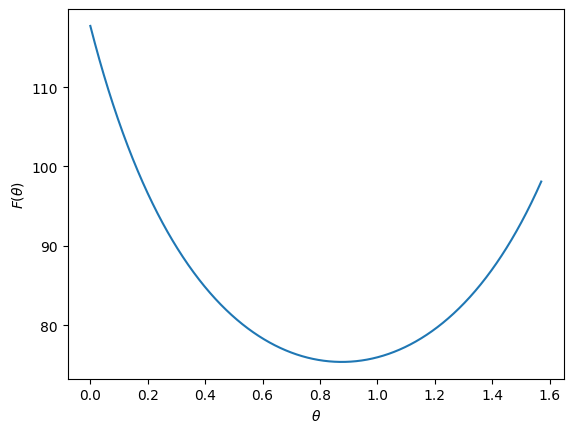

The optimal angle is 0.28pi radians.


In [54]:
mu = 1.2

def G(theta):
    return mu * np.sin(theta) + np.cos(theta)

def Gp(theta):
    return mu * np.cos(theta) - np.sin(theta)

def F(theta):
    return mu * 10 * 9.81 / G(theta)

def Fp(theta):
    return -F(theta) * Gp(theta) / G(theta)

def Fpp(theta):
    return F(theta) * (1 + 2 * Gp(theta)**2 / G(theta)**2)

# Plot the function
fig, ax = plt.subplots()
x = np.linspace(0, np.pi / 2, 1000)
ax.plot(x, F(x))
ax.set(xlabel=r'$\theta$', ylabel=r'$F(\theta)$')
plt.show()

# Newton's method
theta = 1
tol = 1e-12

while abs(Fp(theta)) >= tol:
    theta -= Fp(theta) / Fpp(theta)

print(f'The optimal angle is {theta/np.pi:.2f}pi radians.')

In [55]:
show('Exercise 8')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 9**

Find the coordinates of the point on the curve $y = \tan x$ which is closest to the point $(1, 1)$.

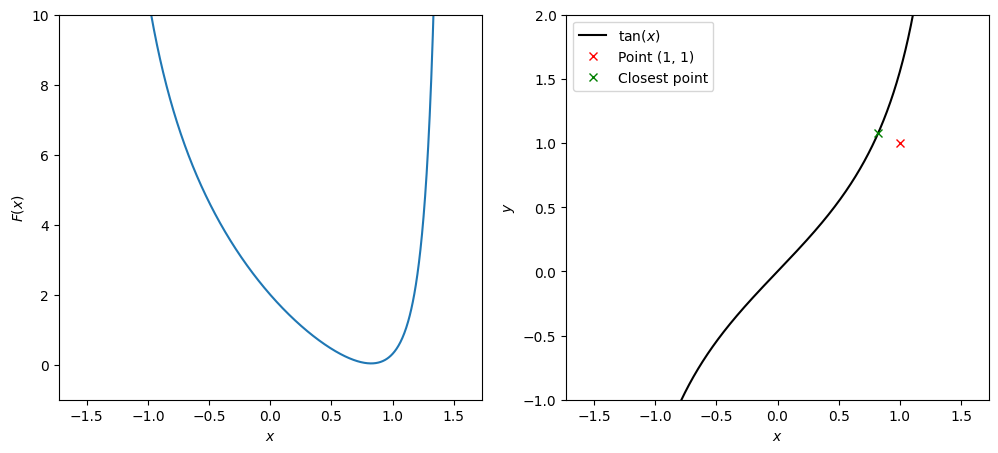

The point has coordinates (0.824, 1.081).


In [59]:
# Minimise the distance between (1, 1) and a point (x0, tan(x0))

def F(x):
    return (x - 1)**2 + (np.tan(x) - 1)**2

def Fp(x):
    return 2 * (x - 1) + 2 / np.cos(x)**2 * (np.tan(x) - 1)

def Fpp(x):
    return 2 + 2 / np.cos(x)**2 * (2 * np.tan(x) * (np.tan(x) - 1) + 1/np.cos(x)**2)

# Plot the function
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x = np.linspace(-np.pi/2, np.pi/2, 1000)
ax[0].plot(x, F(x))
ax[0].set(xlabel=r'$x$', ylabel=r'$F(x)$', ylim=[-1, 10])

ax[1].plot(x, np.tan(x), 'k-', label=r'$\tan(x)$')
ax[1].plot(1, 1, 'rx', label='Point (1, 1)')
ax[1].set(xlabel=r'$x$', ylabel=r'$y$', ylim=[-1, 2])

# Newton's method
x = 1
tol = 1e-12

while abs(Fp(x)) >= tol:
    x -= Fp(x) / Fpp(x)

ax[1].plot(x, np.tan(x), 'gx', label='Closest point')
ax[1].legend()
plt.show()

print(f'The point has coordinates ({x:.3f}, {np.tan(x):.3f}).')

In [60]:
show('Exercise 9')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…